In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("segmentation-data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
df.shape

(2000, 8)

In [6]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [7]:
df_temp = df[['ID', 'Age', 'Income']]
df_temp.head()

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031


In [8]:
from sklearn.preprocessing import MinMaxScaler

age_scaler = MinMaxScaler()
income_scaler = MinMaxScaler()

df['Age'] = age_scaler.fit_transform(df[['Age']])
df['Income'] = income_scaler.fit_transform(df[['Income']])

In [9]:
df = df.drop(['ID'], axis=1)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [11]:
df.dtypes

Sex                  int64
Marital status       int64
Age                float64
Education            int64
Income             float64
Occupation           int64
Settlement size      int64
dtype: object

In [27]:
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=5, verbose=2, max_iter=20)
clusters = kproto.fit_predict(df, categorical=[0,1,3,5,6])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 417, ncost: 248.5947818509649
Run: 1, iteration: 2/20, moves: 41, ncost: 248.50981165690686
Run: 1, iteration: 3/20, moves: 5, ncost: 248.5071607574971
Run: 1, iteration: 4/20, moves: 1, ncost: 248.50677914007636
Run: 1, iteration: 5/20, moves: 0, ncost: 248.50677914007636
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 682, ncost: 245.6368464199467
Run: 2, iteration: 2/20, moves: 150, ncost: 244.96934398280573
Run: 2, iteration: 3/20, moves: 23, ncost: 244.9405766912697
Run: 2, iteration: 4/20, moves: 7, ncost: 244.93453734806178
Run: 2, iteration: 5/20, moves: 6, ncost: 244.93153692600623
Run: 2, iteration: 6/20, moves: 1, ncost: 244.93148129867072
Run: 2, iteration: 7/20, moves: 0, ncost: 244.93148129867072
Init: initializing centroids

In [28]:
kproto.cluster_centroids_

array([[0.29603123, 0.30482909, 0.        , 0.        , 1.        ,
        1.        , 0.        ],
       [0.16983397, 0.26894426, 1.        , 1.        , 1.        ,
        1.        , 0.        ],
       [0.66172146, 0.42575891, 1.        , 1.        , 2.        ,
        1.        , 1.        ],
       [0.33211305, 0.4108451 , 0.        , 0.        , 1.        ,
        1.        , 2.        ],
       [0.29746116, 0.1930812 , 0.        , 0.        , 1.        ,
        0.        , 0.        ]])

In [29]:
clusters

array([2, 1, 4, ..., 4, 1, 4], dtype=uint16)

In [30]:
clusters = clusters.tolist()
type(clusters)

list

In [31]:
df_fin = df.copy(deep=True)
df_fin.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [32]:
df_fin['Age'] = df_temp[['Age']]
df_fin['Income'] = df_temp[['Income']]
df_fin.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [33]:
df_fin['Cluster'] = clusters
df_fin.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,0,0,67,2,124670,1,2,2
1,1,1,22,1,150773,1,2,1
2,0,0,49,1,89210,0,0,4
3,0,0,45,1,171565,1,1,3
4,0,0,53,1,149031,1,1,3


In [34]:
df_fin[df_fin['Cluster']==0].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
9,0,1,28,1,174646,2,0,0
16,0,0,53,1,125550,1,0,0
28,0,0,34,1,119307,1,1,0
31,0,0,27,0,120131,1,1,0
37,0,0,37,1,127676,1,1,0
38,0,0,37,1,119276,1,1,0
39,0,0,24,0,92542,1,1,0
46,0,0,39,1,140182,1,0,0
53,0,0,31,0,117158,1,0,0
76,0,0,34,1,125187,1,1,0


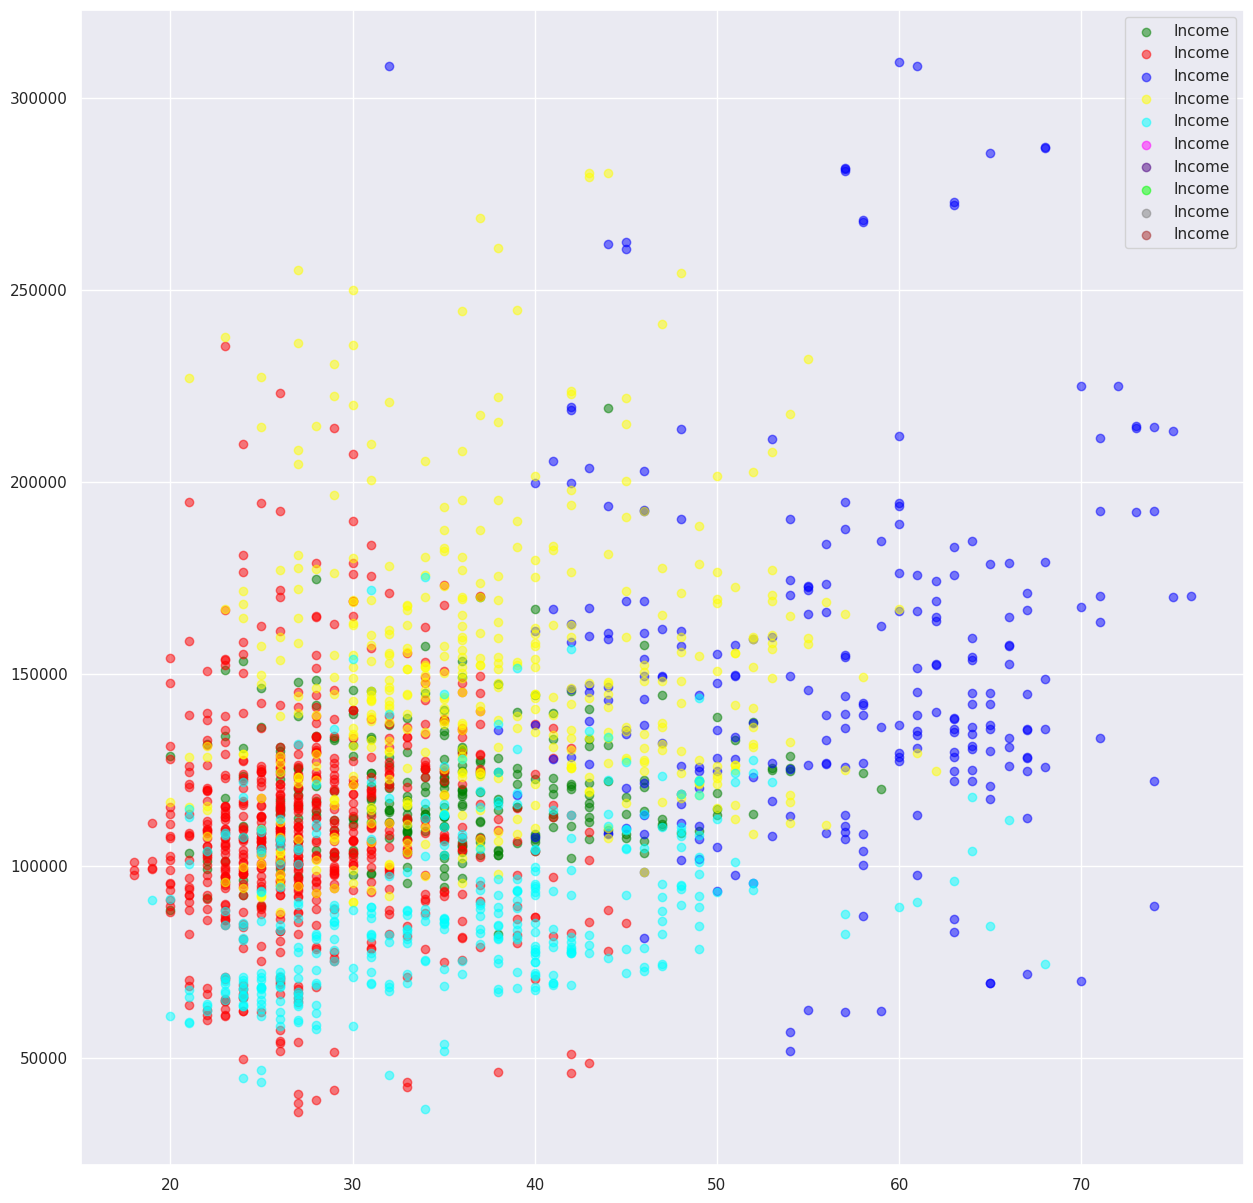

In [37]:
colors = ['green', 'red', 'blue', 'yellow', 'cyan', 'magenta', 'indigo', 'lime', 'gray', 'brown']

plt.figure(figsize=(15,15))
for i in range(10):
    plt.scatter('Age', 'Income', data = df_fin[df_fin['Cluster']==i], color = colors[i], alpha=0.5)
plt.legend()
plt.show()